In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_without_drift_no_seasons = pd.read_csv("../synthetic_generation/data/synthetic_data_normal.csv")
df_without_drift = pd.read_csv("../synthetic_generation/data/calculated_conductivity_seasonal_completed.csv")
df_with_drift = pd.read_csv("../synthetic_generation/data/output/synthetic_drift_20_years_sesonal_3_sesonal_variates.csv")

In [43]:
# Count the number of 0s and 1s in the "class" column of df_with_drift
class_counts = df_with_drift['class'].value_counts()
print(class_counts)

0    338411
1     12276
Name: class, dtype: int64


Temperature


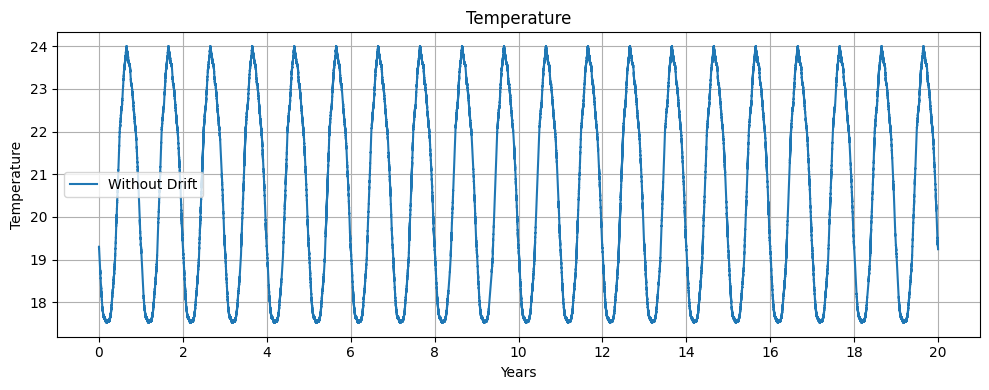

Pressure


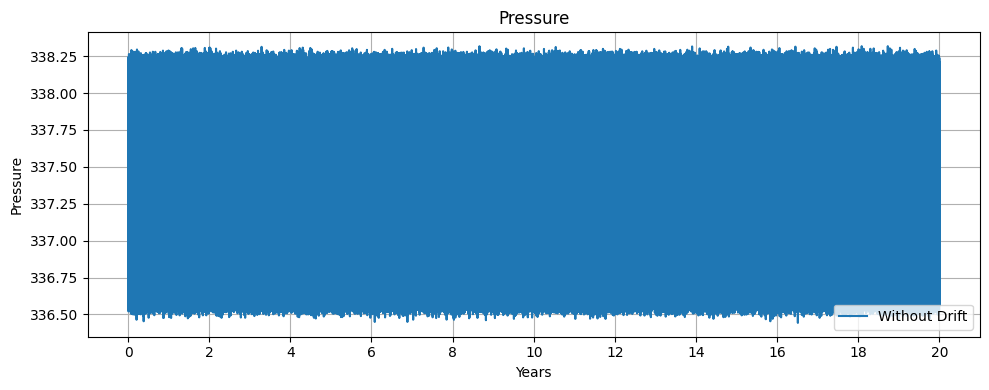

Salinity


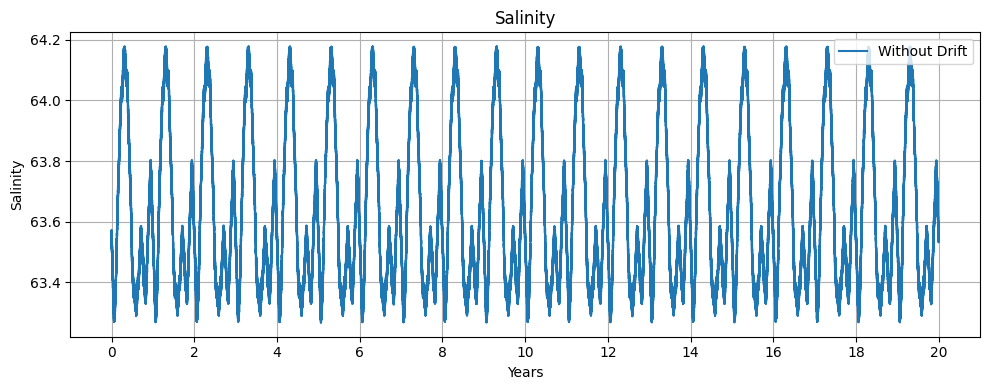

Conductivity


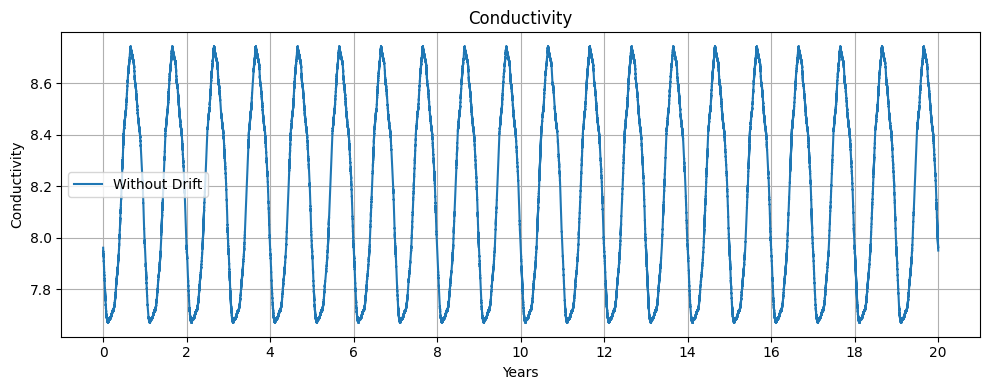

In [4]:
import matplotlib.pyplot as plt
import numpy as np

samples_per_day = 48
days_per_year = 365
samples_per_year = samples_per_day * days_per_year  # 17,520 samples per year

for feature_to_plot in df_without_drift.columns:
    if feature_to_plot == 'Date':
        continue
    print(feature_to_plot)
    
    # Create the x-axis in "years"
    total_samples = len(df_without_drift)
    years = np.arange(total_samples) / samples_per_year

    plt.figure(figsize=(10, 4))
    plt.plot(years, df_without_drift[feature_to_plot], label='Without Drift')
    #plt.plot(years, df_with_drift[feature_to_plot], label='With Drift')
    plt.title(f'{feature_to_plot}')
    plt.xlabel('Years')
    plt.ylabel(feature_to_plot)
    plt.legend()
    plt.grid(True)

  # Show only 10 ticks on the x-axis manually (every 2 years)
    ax = plt.gca()
    tick_positions = np.linspace(0, years[-1], 11)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([f"{int(x)}" for x in tick_positions])

    plt.tight_layout()
    plt.show()


# NY 23.mai

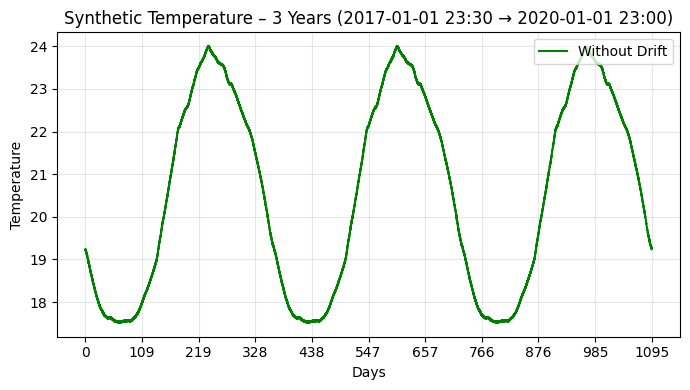

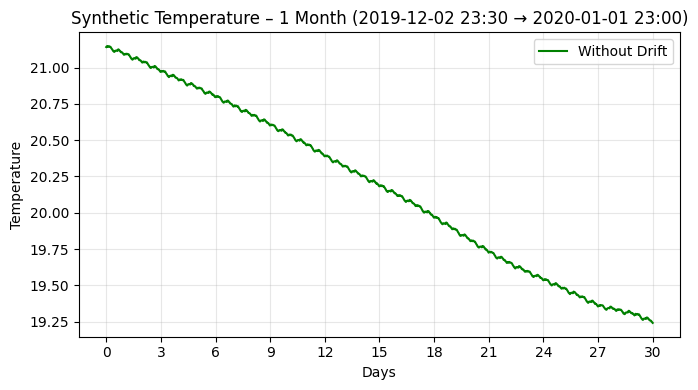

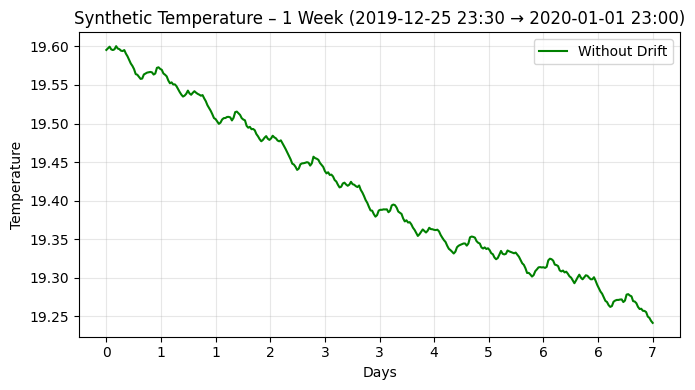

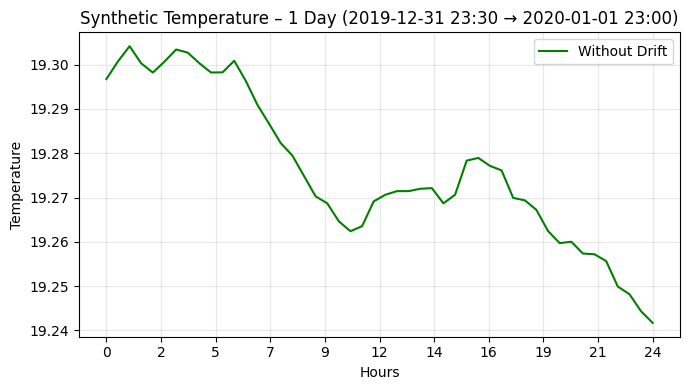

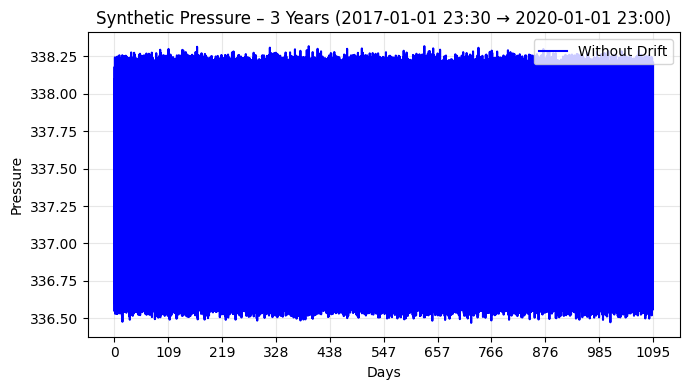

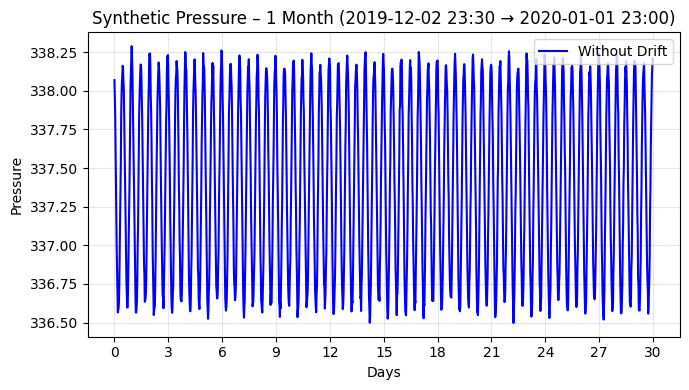

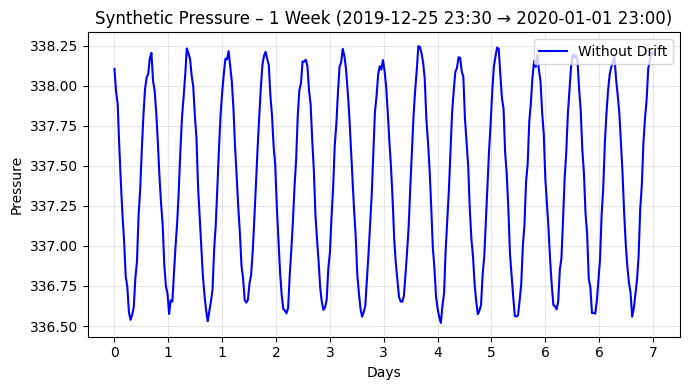

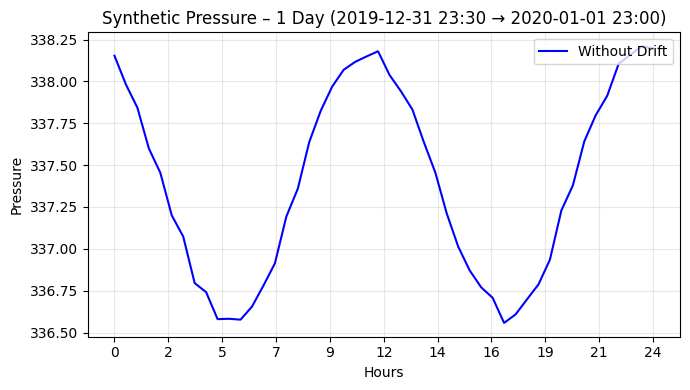

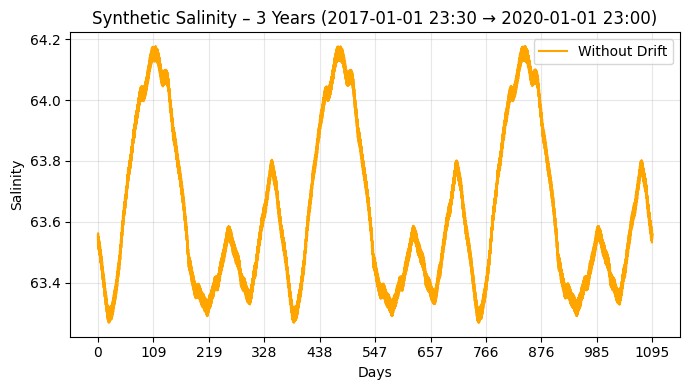

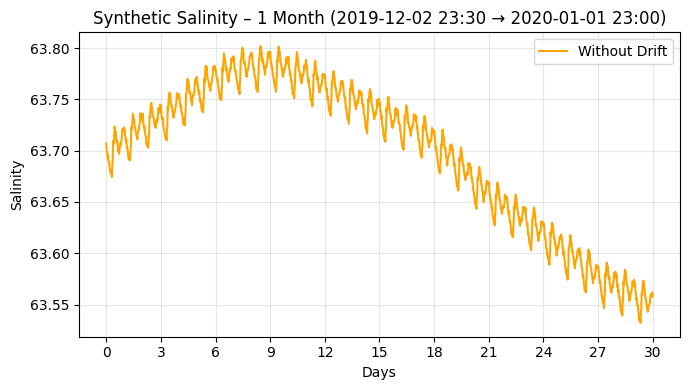

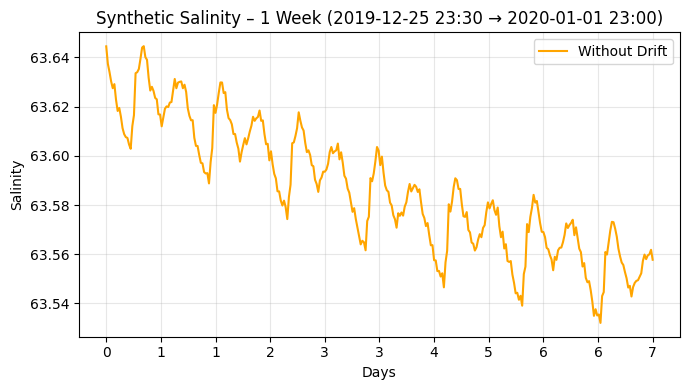

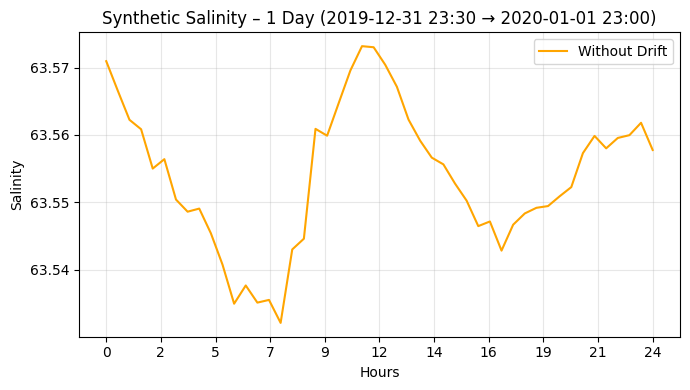

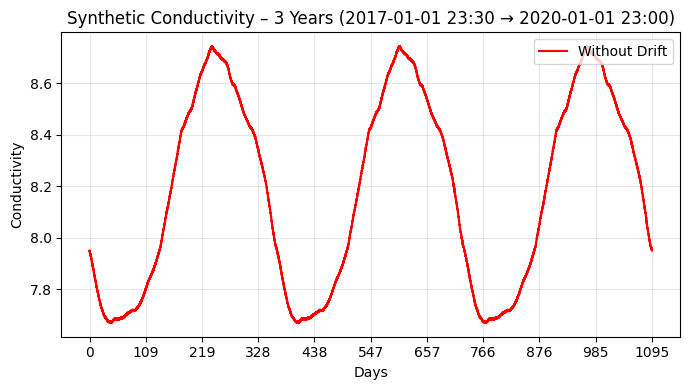

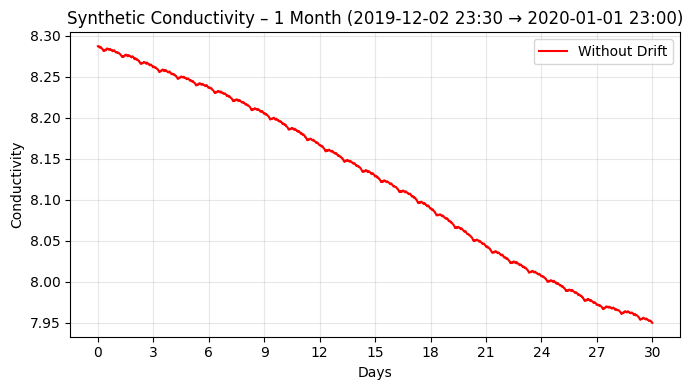

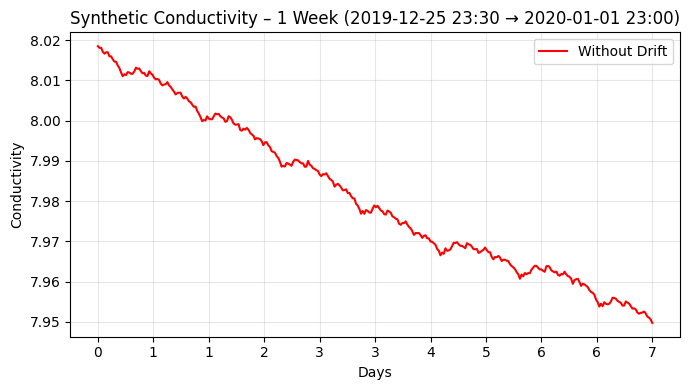

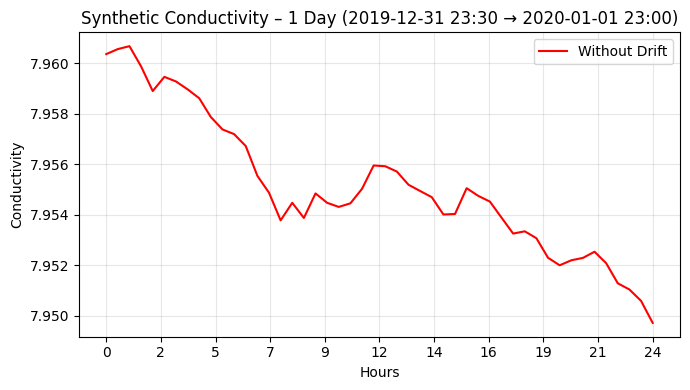

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd                     # NEW
from itertools import cycle
from matplotlib.dates import DateFormatter  # OPTIONAL (for pretty ticks)

# --- sampling parameters -----------------------------------------------------
SAMPLES_PER_DAY  = 48
DAYS_PER_YEAR    = 365
SAMPLES_PER_YEAR = SAMPLES_PER_DAY * DAYS_PER_YEAR

WINDOWS = {
    # '20 Years': SAMPLES_PER_YEAR * 20,
    '3 Years':  SAMPLES_PER_YEAR * 3,
    '1 Month':  SAMPLES_PER_DAY * 30,
    '1 Week':   SAMPLES_PER_DAY * 7,
    '1 Day':    SAMPLES_PER_DAY,
}

# ---------------------------------------------------------------------------
colors    = cycle(['green', 'blue', 'orange', 'red'])
color_map = {feat: next(colors) for feat in df_without_drift.columns if feat != 'Date'}

# make sure the Date column is datetime (once is enough)
df_without_drift['Date'] = pd.to_datetime(df_without_drift['Date'])

for feature in df_without_drift.columns:
    if feature == 'Date':
        continue
    colour = color_map[feature]
    
    for win_name, win_len in WINDOWS.items():
        # --- slice the window ------------------------------------------------
        window_df = df_without_drift.tail(win_len)    # keep Date + all features
        y         = window_df[feature]
        n         = len(y)
        
        # --------------------------------------------------------------------
        # 1)  TITLE RANGE  ----------------------------------------------------
        start_date = window_df['Date'].iloc[0]
        end_date   = window_df['Date'].iloc[-1]
        
        # 2)  X-AXIS  ---------------------------------------------------------
        # Two choices – pick ONE (↓)

        # (A) numeric axis (your original style)  ---------------------------
        # -------- x-axis setup & labelling ----------------------------------
        if win_name == '3 Years':                   # <-- NEW branch
            x = np.arange(n) / SAMPLES_PER_DAY     #  ➜ years
            x_label = 'Days'

        elif win_name == '1 Month':
            x = np.arange(n) / SAMPLES_PER_DAY      #  ➜ days
            x_label = 'Days'

        elif win_name == '1 Week':
            x = np.arange(n) / SAMPLES_PER_DAY      #  ➜ days
            x_label = 'Days'

        else:                                       # 1 Day
            x = np.arange(n) / (SAMPLES_PER_DAY / 24)  # ➜ hours
            x_label = 'Hours'


        # --- plotting (numeric axis) ----------------------------------------
        plt.figure(figsize=(7, 4))
        plt.plot(x, y, color=colour, label='Without Drift')
        plt.legend(loc='upper right')

        # --------------------------------------------------------------------
        # UNCOMMENT this block instead if you want TRUE datetime ticks
        # (B) real datetime axis  --------------------------------------------
        # x = window_df['Date']            # datetime series
        # x_label = 'Date / Time'
        # ax = plt.gca()
        # if win_name == '3 Years':
        #     ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
        # elif win_name in ('1 Month', '1 Week'):
        #     ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
        # else:   # 1 Day
        #     ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
        # plt.figure(figsize=(10, 4))
        # plt.plot(x, y, color=colour, label='Without Drift')
        # plt.gcf().autofmt_xdate()        # slanted ticks
        # --------------------------------------------------------------------

        # shared cosmetics ----------------------------------------------------
        plt.title(f'Synthetic {feature} – {win_name}'
                  f' ({start_date:%Y-%m-%d %H:%M} → {end_date:%Y-%m-%d %H:%M})')
        plt.xlabel(x_label)
        plt.ylabel(feature)
        plt.grid(True, alpha=0.3)

        if x_label != 'Date / Time':       # keep the sparsified numeric ticks
            ax = plt.gca()
            ticks = np.linspace(x.min(), x.max(), 11)
            ax.set_xticks(ticks)
            ax.set_xticklabels([f'{t:.0f}' for t in ticks])

        plt.tight_layout()
        plt.show()


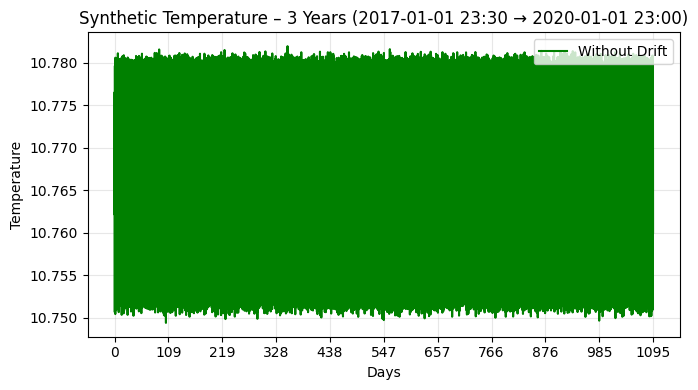

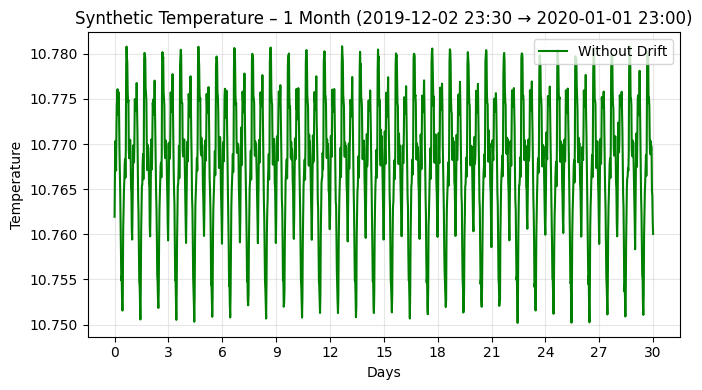

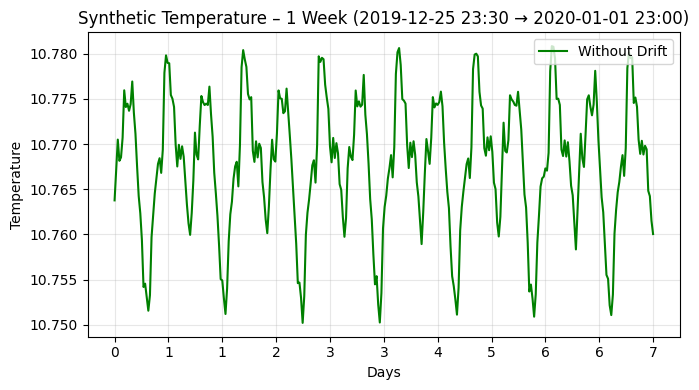

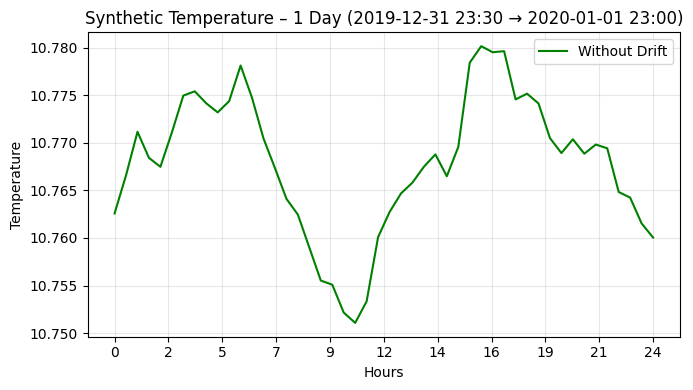

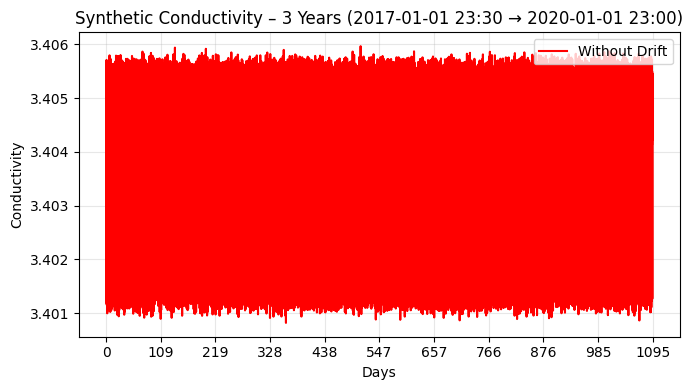

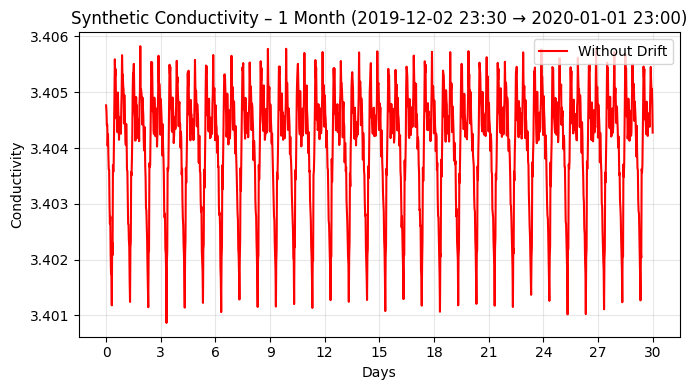

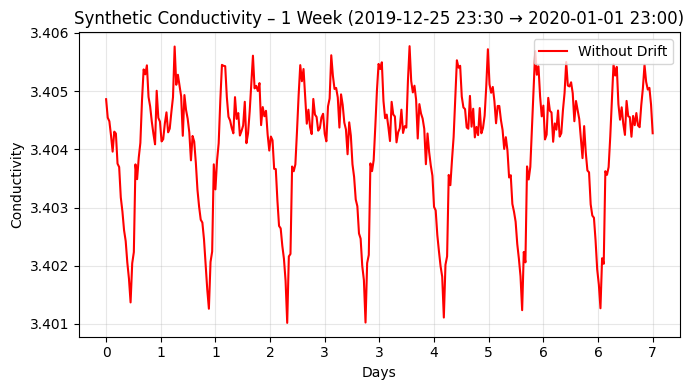

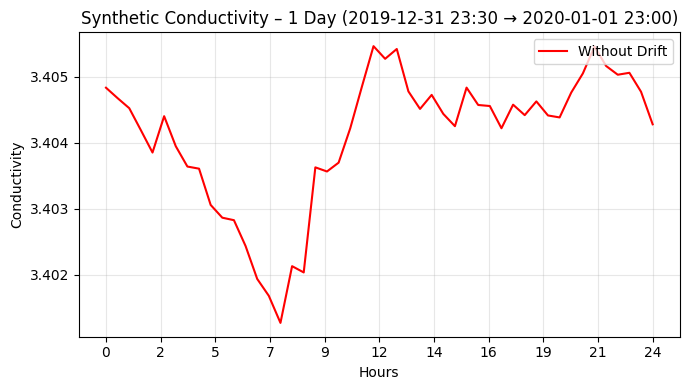

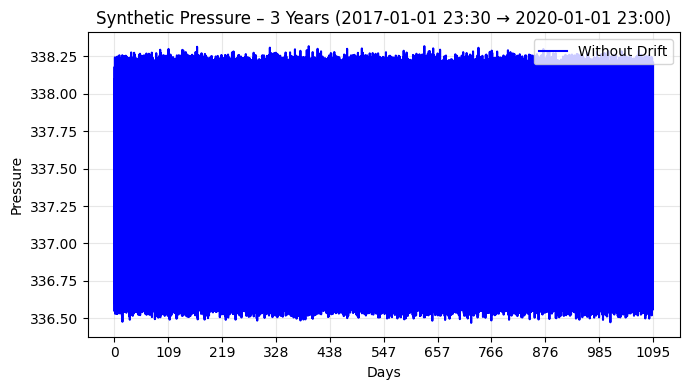

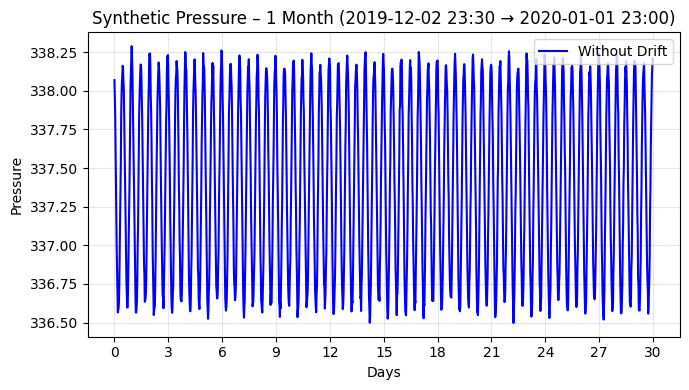

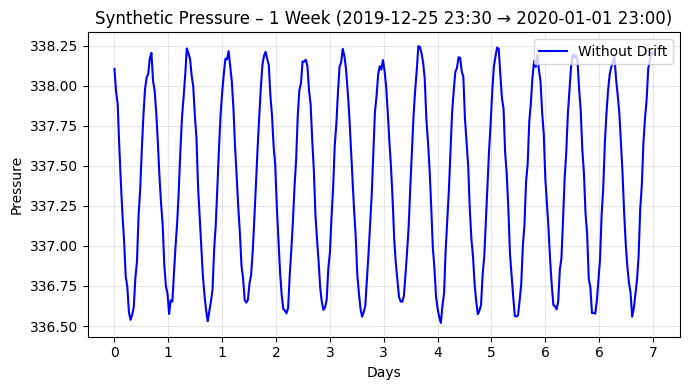

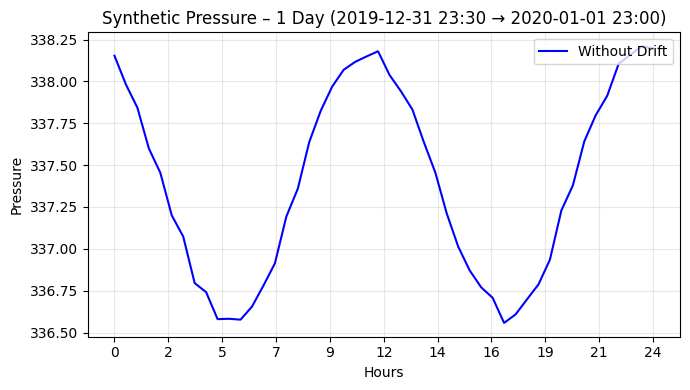

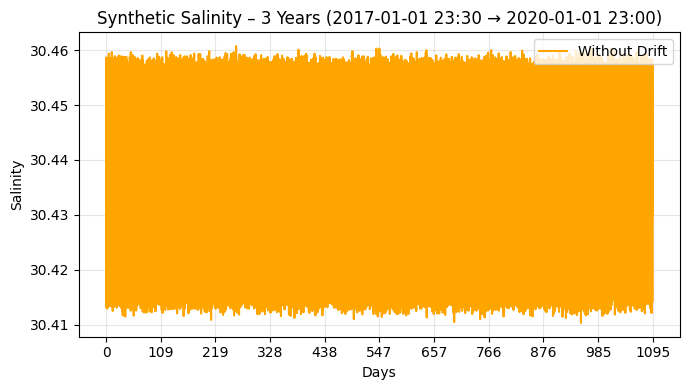

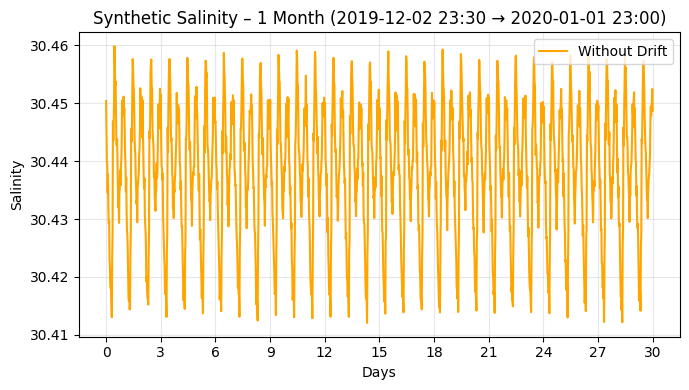

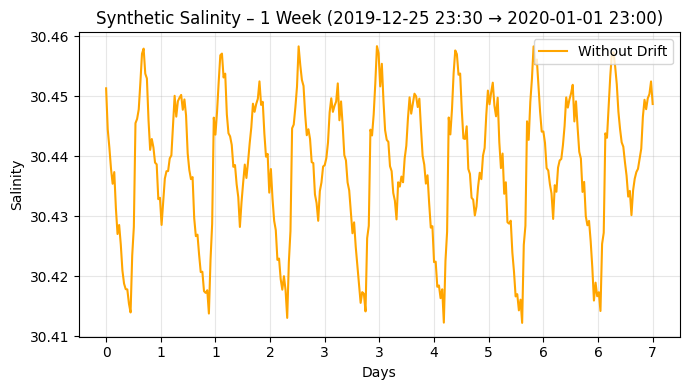

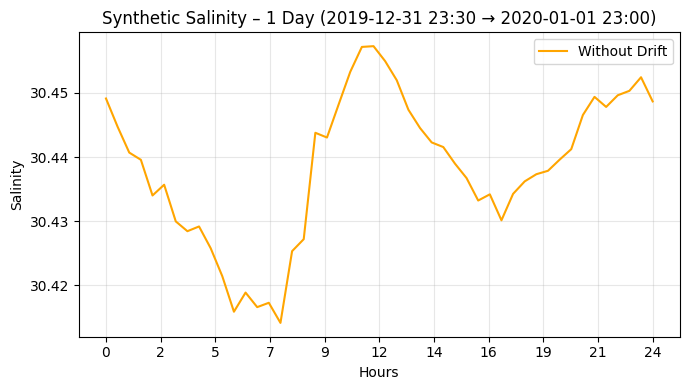

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd                     # NEW
from itertools import cycle
from matplotlib.dates import DateFormatter  # OPTIONAL (for pretty ticks)

# --- sampling parameters -----------------------------------------------------
SAMPLES_PER_DAY  = 48
DAYS_PER_YEAR    = 365
SAMPLES_PER_YEAR = SAMPLES_PER_DAY * DAYS_PER_YEAR

WINDOWS = {
    # '20 Years': SAMPLES_PER_YEAR * 20,
    '3 Years':  SAMPLES_PER_YEAR * 3,
    '1 Month':  SAMPLES_PER_DAY * 30,
    '1 Week':   SAMPLES_PER_DAY * 7,
    '1 Day':    SAMPLES_PER_DAY,
}

# ---------------------------------------------------------------------------
colors    = cycle(['green', 'red', 'blue', 'orange'])
color_map = {feat: next(colors) for feat in df_without_drift_no_seasons.columns if feat != 'Date'}

# make sure the Date column is datetime (once is enough)
df_without_drift_no_seasons['Date'] = pd.to_datetime(df_without_drift_no_seasons['Date'])

for feature in df_without_drift_no_seasons.columns:
    if feature == 'Date':
        continue
    colour = color_map[feature]
    
    for win_name, win_len in WINDOWS.items():
        # --- slice the window ------------------------------------------------
        window_df = df_without_drift_no_seasons.tail(win_len)    # keep Date + all features
        y         = window_df[feature]
        n         = len(y)
        
        # --------------------------------------------------------------------
        # 1)  TITLE RANGE  ----------------------------------------------------
        start_date = window_df['Date'].iloc[0]
        end_date   = window_df['Date'].iloc[-1]
        
        # 2)  X-AXIS  ---------------------------------------------------------
        # Two choices – pick ONE (↓)

        # (A) numeric axis (your original style)  ---------------------------
        # -------- x-axis setup & labelling ----------------------------------
        if win_name == '3 Years':                   # <-- NEW branch
            x = np.arange(n) / SAMPLES_PER_DAY     #  ➜ years
            x_label = 'Days'

        elif win_name == '1 Month':
            x = np.arange(n) / SAMPLES_PER_DAY      #  ➜ days
            x_label = 'Days'

        elif win_name == '1 Week':
            x = np.arange(n) / SAMPLES_PER_DAY      #  ➜ days
            x_label = 'Days'

        else:                                       # 1 Day
            x = np.arange(n) / (SAMPLES_PER_DAY / 24)  # ➜ hours
            x_label = 'Hours'


        # --- plotting (numeric axis) ----------------------------------------
        plt.figure(figsize=(7, 4))
        plt.plot(x, y, color=colour, label='Without Drift')
        plt.legend(loc='upper right')

        # --------------------------------------------------------------------
        # UNCOMMENT this block instead if you want TRUE datetime ticks
        # (B) real datetime axis  --------------------------------------------
        # x = window_df['Date']            # datetime series
        # x_label = 'Date / Time'
        # ax = plt.gca()
        # if win_name == '3 Years':
        #     ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
        # elif win_name in ('1 Month', '1 Week'):
        #     ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
        # else:   # 1 Day
        #     ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
        # plt.figure(figsize=(10, 4))
        # plt.plot(x, y, color=colour, label='Without Drift')
        # plt.gcf().autofmt_xdate()        # slanted ticks
        # --------------------------------------------------------------------

        # shared cosmetics ----------------------------------------------------
        plt.title(f'Synthetic {feature} – {win_name}'
                  f' ({start_date:%Y-%m-%d %H:%M} → {end_date:%Y-%m-%d %H:%M})')
        plt.xlabel(x_label)
        plt.ylabel(feature)
        plt.grid(True, alpha=0.3)

        if x_label != 'Date / Time':       # keep the sparsified numeric ticks
            ax = plt.gca()
            ticks = np.linspace(x.min(), x.max(), 11)
            ax.set_xticks(ticks)
            ax.set_xticklabels([f'{t:.0f}' for t in ticks])

        plt.tight_layout()
        plt.show()


Temperature


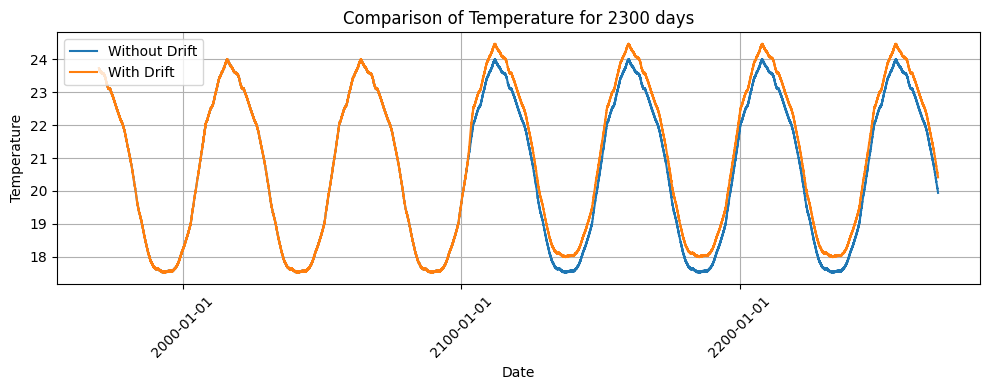

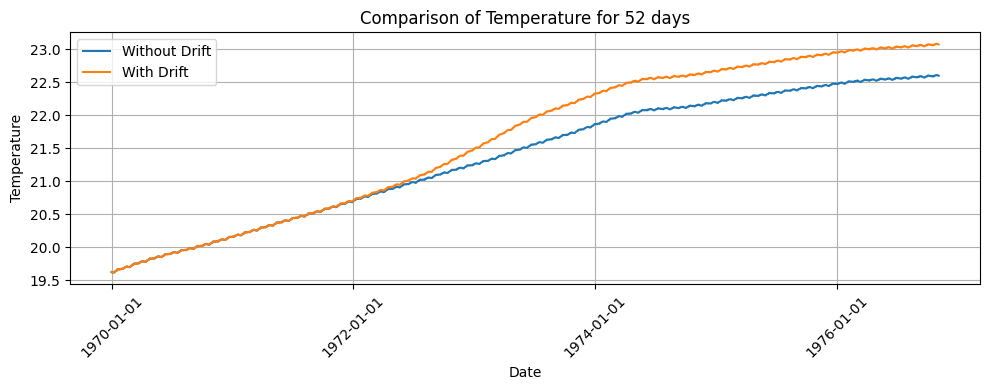

/var/folders/rm/p6w6nqq941n3m4t398xztxph0000gn/T/ipykernel_80149/2830976998.py:33: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.xticks(rotation=45)
/var/folders/rm/p6w6nqq941n3m4t398xztxph0000gn/T/ipykernel_80149/2830976998.py:34: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.tight_layout()
/Users/andreaswergeland/code/masterproject/unsupervised-concept-drift-detection/test_venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes

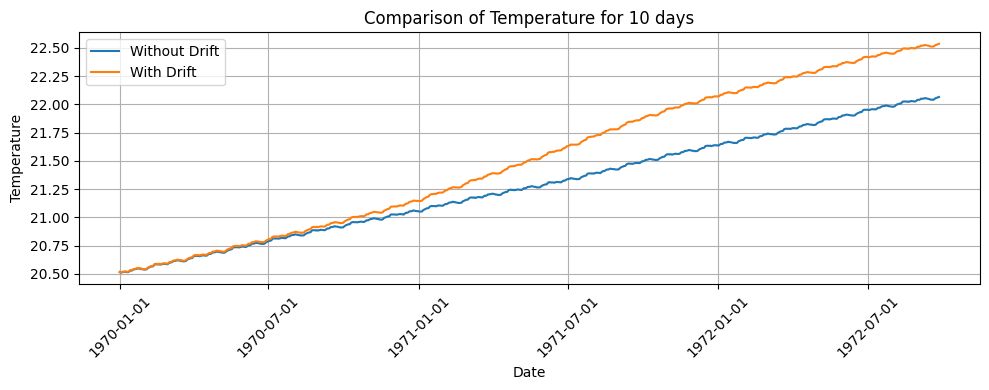

/var/folders/rm/p6w6nqq941n3m4t398xztxph0000gn/T/ipykernel_80149/2830976998.py:53: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.xticks(rotation=45)
/var/folders/rm/p6w6nqq941n3m4t398xztxph0000gn/T/ipykernel_80149/2830976998.py:54: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  plt.tight_layout()
/Users/andreaswergeland/code/masterproject/unsupervised-concept-drift-detection/test_venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes

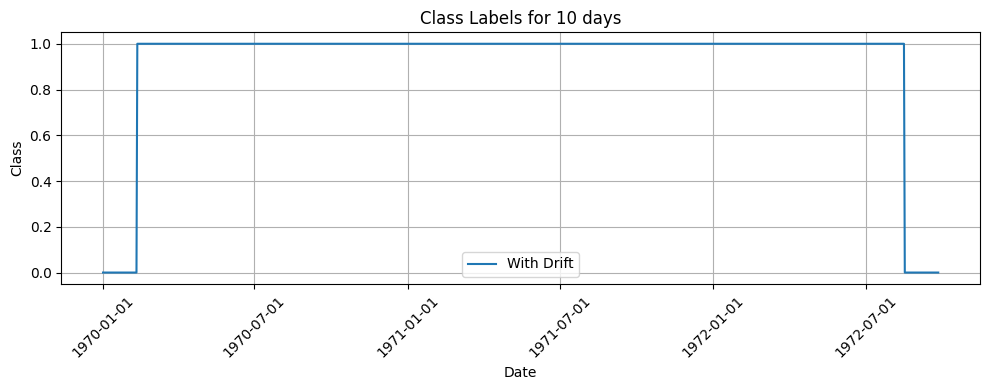

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

for feature_to_plot in df_without_drift.columns:
    if feature_to_plot != 'Temperature':
        continue
    print(feature_to_plot)

    # Define plot ranges and corresponding labels
    ranges = [
        (170000, 280000, '2300 days'),
        (217500, 220000, '52 days'),
        (218100, 219100, '10 days')
    ]

    for start, end, label in ranges:
        dates = df_without_drift['Date'].iloc[start:end]

        plt.figure(figsize=(10, 4))
        plt.plot(dates, df_without_drift[feature_to_plot].iloc[start:end], label='Without Drift')
        plt.plot(dates, df_with_drift[feature_to_plot].iloc[start:end], label='With Drift')
        plt.title(f'Comparison of {feature_to_plot} for {label}')
        plt.xlabel('Date')
        plt.ylabel(feature_to_plot)
        plt.legend()
        plt.grid(True)

        # Format x-axis to show only 5 date labels
        ax = plt.gca()
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=5))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Plotting the class labels for the same 10-day period
    start, end = 218100, 219100
    dates = df_with_drift['Date'].iloc[start:end]

    plt.figure(figsize=(10, 4))
    plt.plot(dates, df_with_drift["class"].iloc[start:end], label='With Drift')
    plt.title(f'Class Labels for 10 days')
    plt.xlabel('Date')
    plt.ylabel('Class')
    plt.legend()
    plt.grid(True)

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


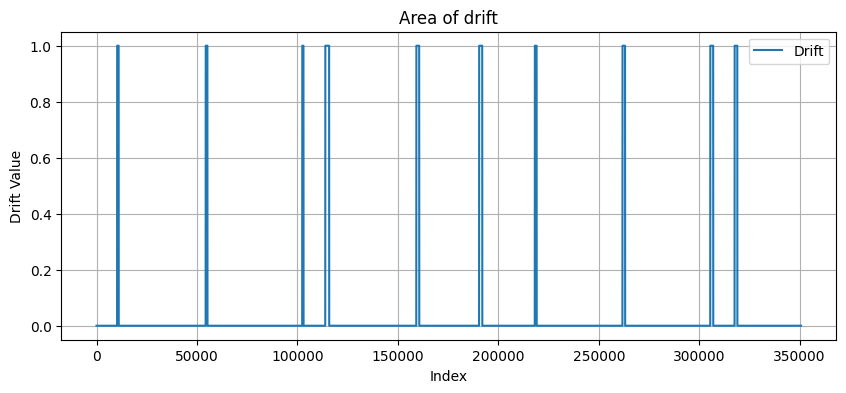

In [7]:
# Plot the computed drift.
plt.figure(figsize=(10, 4))
plt.plot(df_with_drift['class'], label='Drift')
plt.title('Area of drift')
plt.xlabel('Index')
plt.ylabel('Drift Value')
plt.legend()
plt.grid(True)
plt.show()